# AM 205 - Assignment 4

## By Jonathan Guillotte-Blouin

In [3]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys
from scipy.integrate import quad

### Question 1: Convergence and stability of a numerical scheme

#### a) Show that the numerical scheme is second-order accurate.

Recall that $u_j^n$ is a numerical approximation of $u(j\Delta x, n\Delta t)$. The scheme is 

$$ \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} - c^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2} = 0$$

Let's start by Taylor expanding all the terms around $(j\Delta x, n\Delta t)$.

$$ u_j^{n+1} = u_j^n + \frac{\partial u_j^n \Delta t}{\partial t} + \frac{\partial^2 u_j^n \Delta t^2}{2 \partial t^2} + \texttt{...} $$

$$ u_j^{n-1} = u_j^n - \frac{\partial u_j^n \Delta t}{\partial t} + \frac{\partial^2 u_j^n \Delta t^2}{2 \partial t^2} + \texttt{...} $$

Note that the last two expansions ignored the terms in the expansion with a partial derivative in $x$, as they are subsequently multiplied by $j \Delta x - j \Delta x = 0$.

$$ \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} = \frac{\left(u_j^n + \frac{\partial u_j^n \Delta t}{\partial t} + \frac{\partial^2 u_j^n \Delta t^2}{2 \partial t^2} + \texttt{...}\right) - 2u_j^n + \left(u_j^n - \frac{\partial u_j^n \Delta t}{\partial t} + \frac{\partial^2 u_j^n \Delta t^2}{2 \partial t^2} + \texttt{...}\right)} {\Delta t^2} $$
$$ = \frac{\frac{\partial^2 u_j^n \Delta t^2}{\partial t^2} + \frac{2 \partial^4 u_j^n \Delta t^4}{4! \partial t^4} + \texttt{...}}{\Delta t^2}$$
$$ \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} = \frac{\partial^2 u_j^n}{\partial t^2} + \frac{\partial^4 u_j^n \Delta t^2}{4! \partial t^4} + \texttt{...} = O(\Delta t^2)$$

The first term of our scheme has been simplified, let's go Taylor expand the terms on the right.

$$ u_{j+1}^n = u_j^n + \frac{\partial u_j^n \Delta x}{\partial x} + \frac{\partial^2 u_j^n \Delta x^2}{2 \partial x^2} + \texttt{...} $$

$$ u_{j-1}^n = u_j^n - \frac{\partial u_j^n \Delta x}{\partial x} + \frac{\partial^2 u_j^n \Delta x^2}{2 \partial x^2} + \texttt{...} $$

Note that the last two expansions ignored the terms in the expansion with a partial derivative in $t$, as they are subsequently multiplied by $n \Delta t - n \Delta t = 0$.

$$ \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2} = \frac{\left(u_j^n + \frac{\partial u_j^n \Delta x}{\partial x} + \frac{\partial^2 u_j^n \Delta x^2}{2 \partial x^2} + \texttt{...}\right) - 2u_j^n + \left(u_j^n - \frac{\partial u_j^n \Delta x}{\partial x} + \frac{\partial^2 u_j^n \Delta x^2}{2 \partial x^2} + \texttt{...}\right)} {\Delta x^2} $$
$$ = \frac{\frac{\partial^2 u_j^n \Delta x^2}{\partial x^2} + \frac{2 \partial^4 u_j^n \Delta x^4}{4! \partial x^4} + \texttt{...}}{\Delta x^2}$$
$$ \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2} = \frac{\partial^2 u_j^n}{\partial x^2} + \frac{\partial^4 u_j^n \Delta x^2}{4! \partial x^4} + \texttt{...} = O(\Delta x^2)$$

We have all we need to find the accuracy.

$$ \texttt{Error} = \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} - c^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2} = O(\Delta t^2) - c^2 O(\Delta x^2) = O(\Delta t^2) - O(\Delta x^2)$$

From this, we can say that the scheme is indeed second-order accurate both in $x$ and in $t$, so is overall second-order accurate.

#### b) Use Fourier stability analysis to show that the numerical scheme is stable.

$$ \frac{u_j^{n+1} - 2u_j^n + u_j^{n-1}}{\Delta t^2} - c^2 \frac{u_{j+1}^n - 2u_j^n + u_{j-1}^n}{\Delta x^2} = 0$$

$$ u_j^{n+1} =  2u_j^n - u_j^{n-1} + v^2 \left(u_{j+1}^n - 2u_j^n + u_{j-1}^n\right) \texttt{ s.t. } v = \frac{\Delta t \cdot c}{\Delta x}$$


Let's use the ansatz $u_j^n = \lambda(k)^n e^{ijk\Delta x}$

$$ \lambda(k)^{n+1} e^{ijk\Delta x} = 2\lambda(k)^n e^{ijk\Delta x} - \lambda(k)^{n-1} e^{ijk\Delta x} + v^2 \left( \lambda(k)^n e^{i(j+1)k\Delta x} - 2\lambda(k)^n e^{ijk\Delta x} + \lambda(k)^n e^{i(j-1)k\Delta x} \right)$$

If we divide by a factor $\lambda(k)^{n-1} e^{ijk\Delta x}$

$$ \lambda(k)^2 = 2\lambda(k) - 1 + v^2 \left( \lambda(k) e^{ik\Delta x} - 2\lambda(k) + \lambda(k) e^{-ik\Delta x} \right)$$

$$ \lambda(k)^2 = 2\lambda(k) - 1 + v^2 \lambda(k) \left(e^{ik\Delta x} - 2 + e^{-ik\Delta x} \right)$$

$$ \lambda(k)^2 = 2\lambda(k) - 1 + v^2 \lambda(k) \left(2 \cos(k\Delta x) - 2 \right)$$

$$ \lambda(k)^2 = 2\lambda(k) - 1 + 2v^2 \lambda(k) \left(\cos(k\Delta x) - 1 \right)$$

$$ \lambda(k)^2 = 2\lambda(k) \left[ 1 + v^2 \left(\cos(k\Delta x) - 1 \right) \right] - 1$$

$$ \lambda(k)^2 - 2 \left[ 1 + v^2 \left(\cos(k\Delta x) - 1 \right) \right] \lambda(k) + 1 = 0$$

We have a quadratic formula with $a=1$, $b = - 2 \left[ 1 + v^2 \left(\cos(k\Delta x) - 1 \right) \right]$, and $c=1$. Let's find the constraints on b, starting from $\cos(k\Delta x)$, and going outwards. Note as well that we will set $0 \leq v \leq 1$, based on the CFL condition.

$$-1 \leq \cos(k\Delta x) \leq 1$$

$$-2 \leq \cos(k\Delta x) - 1 \leq 0$$

$$-2 \leq v^2 \left( \cos(k\Delta x) - 1\right) \leq 0$$

$$ -1 \leq 1 + v^2 \left(\cos(k\Delta x) - 1 \right) \leq 1$$

$$ 2 \geq -2 \left[ 1 + v^2 \left(\cos(k\Delta x) - 1 \right) \right] \geq -2 $$

Hence, we know $-2 \leq b \leq 2$. The roots of the quadratic formula are

$$ \lambda(k) = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

$$ \lambda(k) = \frac{-b \pm \sqrt{b^2 - 4}}{2} $$

Let's find the critical points on our domain.

$$ \lambda'(k) = \frac{1}{2} \left(-1 \pm \frac{b}{\sqrt{b^2 - 4}}\right) $$

$\lambda'(k)$ is not defined at $b = \pm 2$, $b=-2$ and $b=2$ are therefore critical points to evaluate.

We have an extremum when $\frac{\pm b}{\sqrt{b^2 - 4}} = 1$, but no solutions exist for this system. There is no extremum on our domain.

We need to consider the limits of our domain too, but they are already critical points because they are undefined under the derivative.  We have all our critical points, let's evaluate them.

$\lambda(-2) = 1$, and $\lambda(2) = -1$. $|\lambda(k)| = 1$.

Without extremum in our domain, we know that $|\lambda(k)| = 1 \, \forall k$ if $0 \leq v \leq 1$ [CFL condition], so the numerical scheme is stable.

What follows is a visualization of the results, which concurs with the analysis.

In [79]:
bs = np.linspace(-2, 2, 10000)
roots_pos_magnitude = []
roots_pos_real = []
roots_pos_imag = []
roots_neg_magnitude = []
roots_neg_real = []
roots_neg_imag = []
for b in bs:
    root1, root2 = np.roots([1, b, 1])
    roots_pos_magnitude.append(abs(root1)) # abs of complex number gives its magnitude
    roots_neg_magnitude.append(abs(root2))
    roots_pos_real.append(root1.real)
    roots_pos_imag.append(root1.imag) 
    roots_neg_real.append(root2.real) 
    roots_neg_imag.append(root2.imag)
    
print("Max magnitude of lambda(k):", max(roots_pos_magnitude + roots_neg_magnitude))

Max magnitude of lambda(k): 1.0


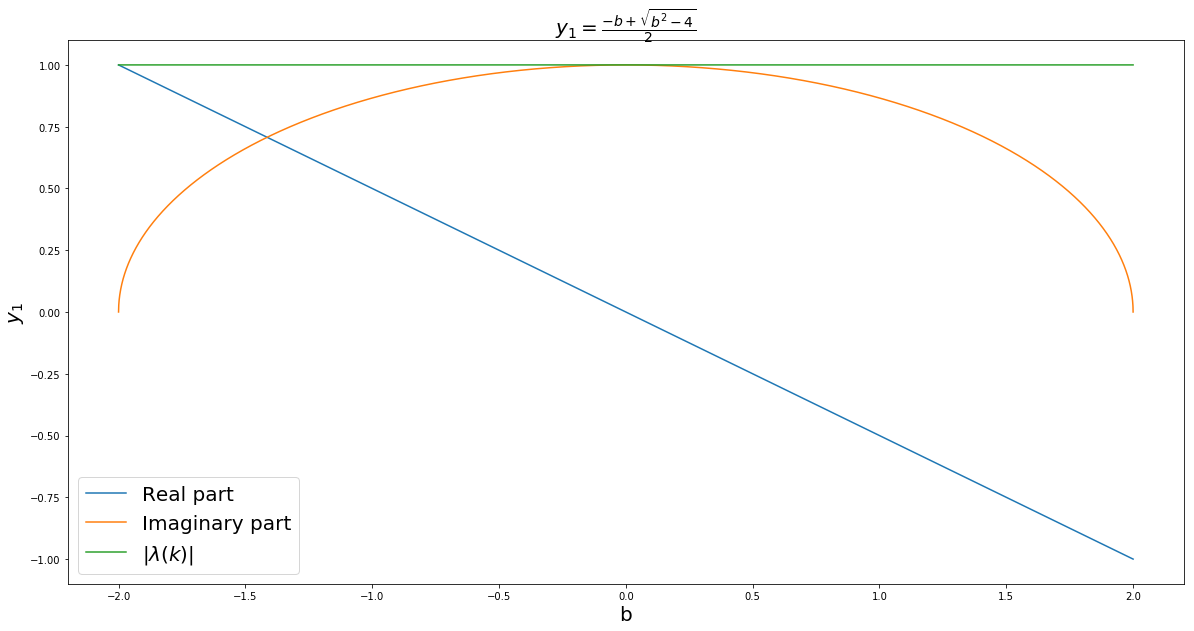

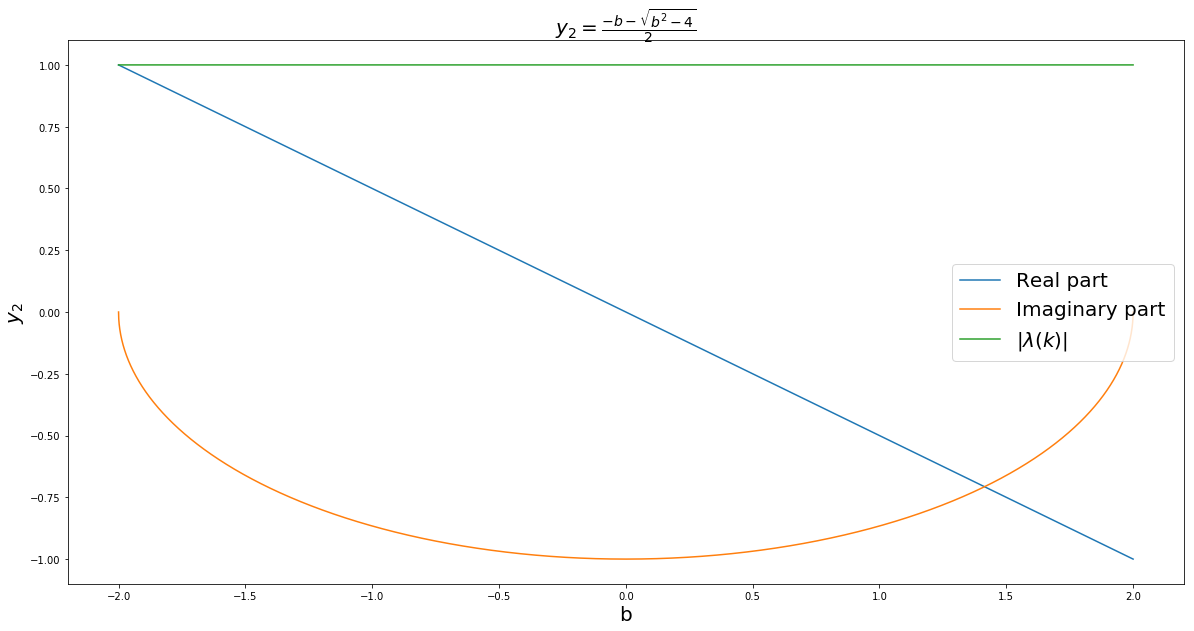

In [124]:
plt.figure(figsize=(20,10))
plt.plot(bs, roots_pos_real, label="Real part")
plt.plot(bs, roots_pos_imag, label="Imaginary part")
plt.plot(bs, roots_pos_magnitude, label=r"$|\lambda(k)|$")
plt.title(r"$y_1 = \frac{-b + \sqrt{b^2 - 4}}{2}$", fontsize=20)
plt.xlabel("b", fontsize=20)
plt.ylabel(r"$y_1$", fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(bs, roots_neg_real, label="Real part")
plt.plot(bs, roots_neg_imag, label="Imaginary part")
plt.plot(bs, roots_neg_magnitude, label=r"$|\lambda(k)|$")
plt.title(r"$y_2 = \frac{-b - \sqrt{b^2 - 4}}{2}$", fontsize=20)
plt.xlabel("b", fontsize=20)
plt.ylabel(r"$y_2$", fontsize=20)
_ = plt.legend(fontsize=20)

### Question 2: Totally rocking out in Pierce Hall

#### a) Write a program to solve for the pressure field inside the building.

In [137]:
def get_pierce_map():
    path = "pierce.txt"
    
    return np.array([l.strip().split(" ") for l in open(path, 'r').readlines()],dtype=np.int8)

pierce = get_pierce_map()

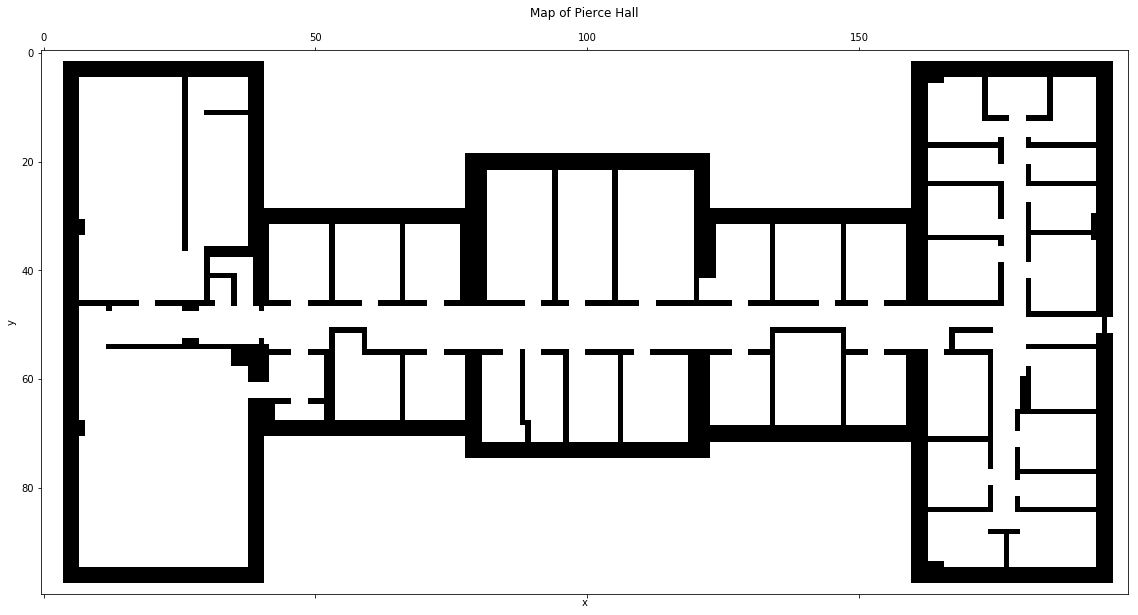

In [138]:
plt.figure(figsize=(20,10))
plt.spy(pierce)
plt.title("Map of Pierce Hall")
plt.xlabel("x")
_ = plt.ylabel("y")

Starting from the equation

$$
\frac{P_{j,k}^{n+1} - 2P_{j,k}^n + P_{j,k}^{n-1}}{\Delta t^2} - c^2 \frac{P_{j+1,k}^n + P_{j,k+1}^n - 4P_{j,k}^n + P_{j-1,k}^n+P_{j,k-1}^n}{h^2} = 0
$$

we can isolate $P_{j,k}^{n+1}$, which gives

$$
P_{j,k}^{n+1}= \frac{\Delta t^2 \cdot c^2}{h^2} \left(P_{j+1,k}^n + P_{j,k+1}^n - 4P_{j,k}^n + P_{j-1,k}^n+P_{j,k-1}^n \right) + 2P_{j,k}^n - P_{j,k}^{n-1}
$$

To solve $p^{n+1}$, we therefore need to know $p^n$ and $p^{n-1}$. It just so happens that we are given initial conditions for $p^0$ and $p^1$, so we can solve $p^2$. Once $p^2$ is solved, we can solve $p^3$, and so on.

As optimizations to the code:
1. We memoize $p^{n-1}$ and $p^n$, so solving $p^{n+1}$ doesn't need to run recursively over and over (which would be redundant in terms of computations).
2. We don't run the routine `p` on all 200x100 = 20000 points. Before starting, we ran a routine `get_inside_coords` that finds all reachable points from the speaker **S** (not walls) using an iterative DFS. This reduced our list of points to compute to 8966.

The routine in **part b)** runs in 2m24s on my laptop (204s)!

**Note**: the $\Delta t$ used is $0.0005s$ (which is smaller than the required $\frac{h}{2c} = \frac{36.6}{2 \cdot 3.43\times10^4} \approx 0.0005335276968s $).

In [139]:
def in_s(j, k):
    return j >= 57 and j <= 60 and k >= 15 and k <= 18

def f(t):
    p0 = 10
    omega = 100 * np.pi
    
    return p0 * np.sin(omega * t)

def get_delta_t():
    return 0.0005 # must be smaller than h / (2c)

def get_n_from_t(t):
    return round(t / get_delta_t())

def get_t_from_n(n):
    return round(n * get_delta_t(), 4)

# compute all P values for cells reachable from S, at time n+1
def p(inside_coords, n, pn=None, pn_min1=None):
    h = 36.6
    c = 3.43e4
    delta_t = get_delta_t()
    left_factor = (delta_t**2) * (c**2) / (h**2)
    pn_plus1 = np.zeros(pierce.shape, dtype=np.float64)

    for j, k in inside_coords:
        if in_s(j, k):
            pn_plus1[j,k] = f(n * delta_t)
            continue
        if n == 0 or n == 1:
            pn_plus1[j,k] = 0
            continue

        pn_j_k = pn[j,k]
        pn_min1_j_k = pn_min1[j,k]
        pn_jplus1_k = pn[j+1, k] if pierce[j+1, k] == 0 else pn_j_k # ghost node case
        pn_j_kplus1 = pn[j, k+1] if pierce[j, k+1] == 0 else pn_j_k # ghost node case 
        pn_jmin1_k = pn[j-1, k] if pierce[j-1, k] == 0 else pn_j_k # ghost node case 
        pn_j_kmin1 = pn[j, k-1] if pierce[j, k-1] == 0 else pn_j_k # ghost node case 

        pn_plus1[j,k] = left_factor * (pn_jplus1_k + pn_j_kplus1 - 4*pn_j_k + pn_jmin1_k + pn_j_kmin1) + 2*pn_j_k - pn_min1_j_k

    return pn_plus1

# iterative DFS to visit all cells within the building that are reachable from the seed (the speaker)
def get_inside_coords(seed):
    visited = set()
    to_visit = [seed]
    
    while len(to_visit) > 0:
        visiting = to_visit.pop()
        if visiting in visited:
            continue
        
        visited.add(visiting)
        j, k = visiting

        if pierce[j-1,k] == 0 and ((j-1,k) not in visited):
            to_visit.append((j-1, k))
        if pierce[j+1,k] == 0 and ((j+1,k) not in visited):
            to_visit.append((j+1, k))
        if pierce[j,k-1] == 0 and ((j,k-1) not in visited):
            to_visit.append((j, k-1))
        if pierce[j,k+1] == 0 and ((j,k+1) not in visited):
            to_visit.append((j, k+1))
        
    return visited
    
# find the cells inside the building reachable from S (seed)
seed = (57, 15)
inside_coords = get_inside_coords(seed)

In [140]:
# NOTE: TAKEN FROM THE FILES
# Returns a scaled value of a function in the range 0 to 1, truncating it if
# necessary
def fscale(v,vmin,vsca):
    vs=(v-vmin)*vsca
    if vs<0: vs=0
    if vs>1: vs=1
    return vs

# Returns a black->red->yellow color scheme (matching Gnuplot's PM3D scheme)
def palette2(v):
    if v>0.5:
        vs=0
    else:
        vs=np.sin(2*np.pi*v)
    return (np.sqrt(v),v*v*v,vs)

# Outputs a 2D image from a field using the palette2 color scheme
# p: the 2D field to plot
# wa: the matrix describing walls to overlay
# (vmin,vmax): the field range
# ups: the upsampling factor to use (so each field point is convert into an ups
#      by ups square)
def plot2(p,wa,vmin,vmax,ups):
    
    # Check matrix dimensions are the same
    (m,n)=p.shape
    if (m,n)!=wa.shape:
        print("Matrix dimension mismatch")

    # Set up output array and scaling constant
    o=np.zeros((m*ups,n*ups,3))
    vsca=1.0/(vmax-vmin)

    # Assemble the output array
    for i in range(m):
        iu=i*ups
        for j in range(n):
            ju=j*ups

            if wa[i,j]==1:
                o[iu:iu+ups,ju:ju+ups,0]=1
                o[iu:iu+ups,ju:ju+ups,1]=1
                o[iu:iu+ups,ju:ju+ups,2]=1
            else:
                (re,gr,bl)=palette2(fscale(p[i,j],vmin,vsca))
                o[iu:iu+ups,ju:ju+ups,0]=re
                o[iu:iu+ups,ju:ju+ups,1]=gr
                o[iu:iu+ups,ju:ju+ups,2]=bl

    # return the image
    return o

#### b) Make two-dimensional plots of the pressure field.

Wave after 0.015s


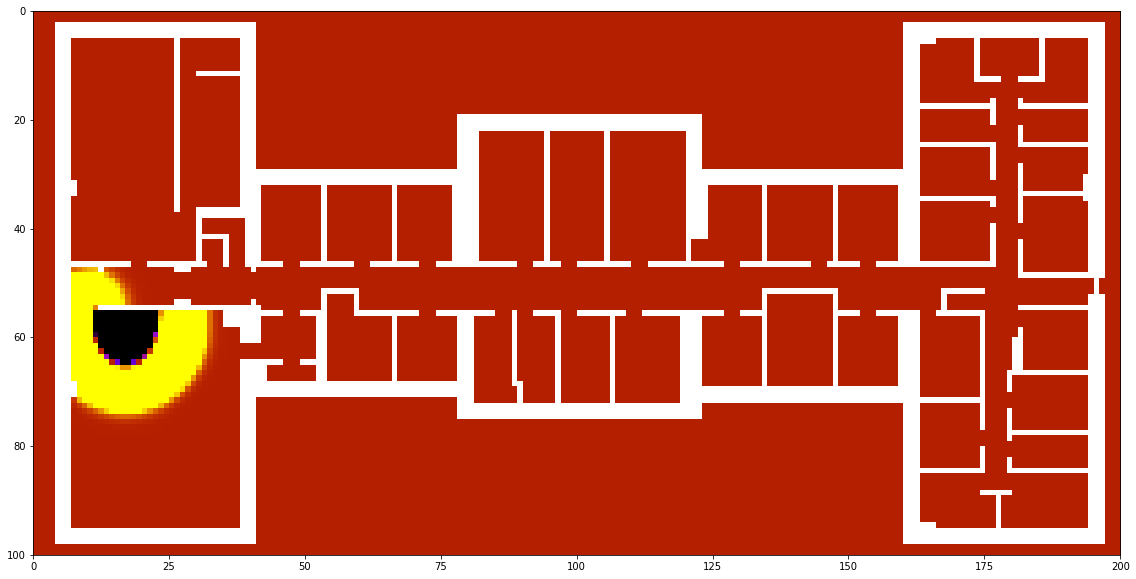

Wave after 0.105s


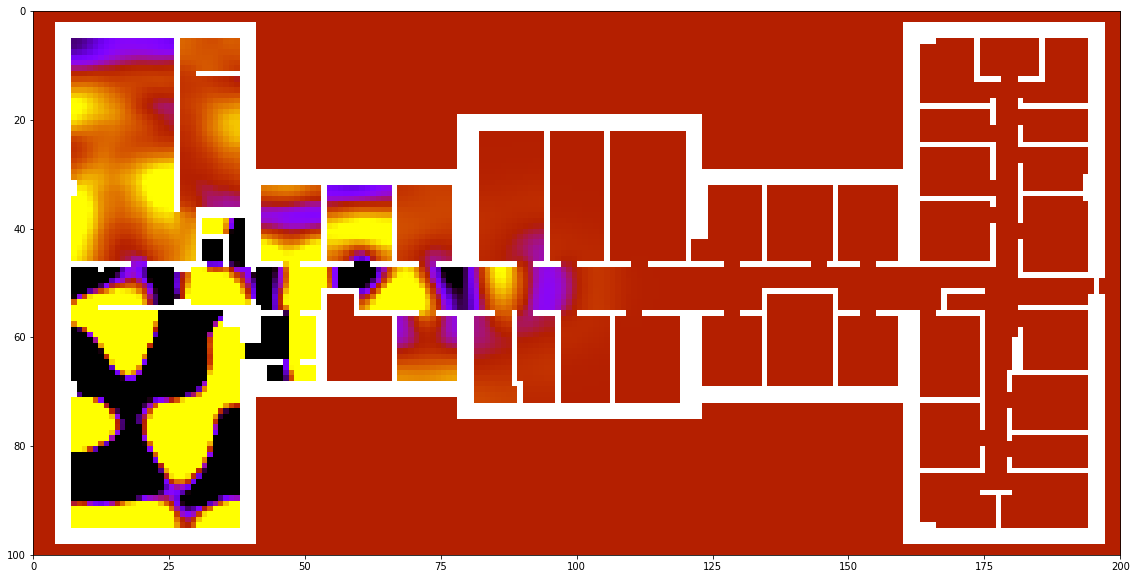

Wave after 0.505s


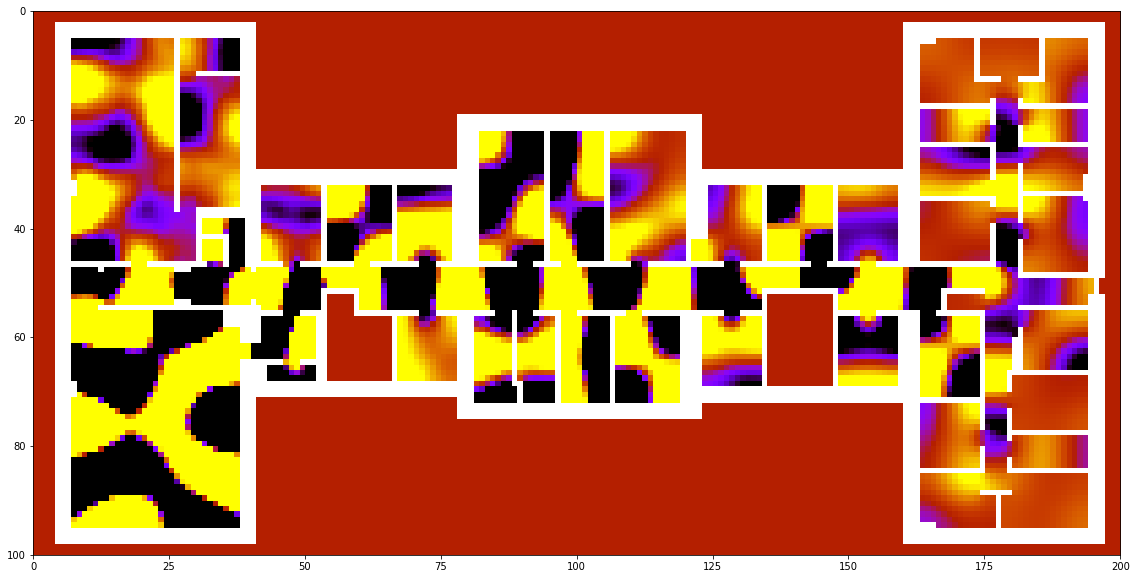

Wave after 1.005s


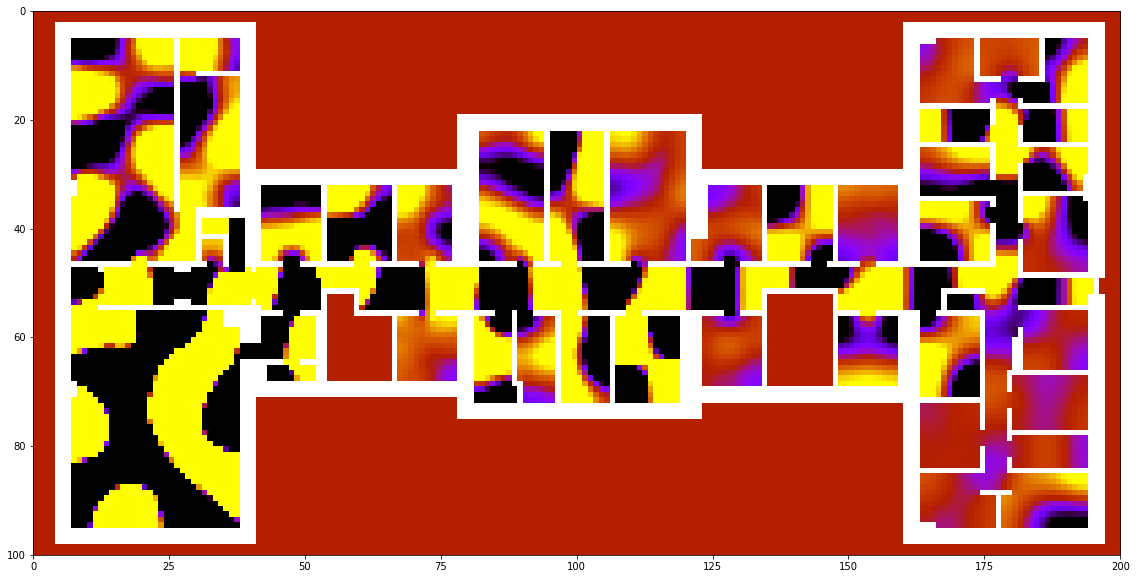

In [144]:
'''
Here, we compute the pressures at all points reachable from the speaker until 1.005s.
To compute at iteration n+1, we use the results memoized for iterations n-1 and n.
We don't cache older iterations, so while we compute iteration n+1, we store the pressures at points C, G, and M (for
subsequent questions).
As well, when we happen to be computing one of the 4 iterations requested in b), we plot it.
'''
pn_min1, pn = p(inside_coords, 0), p(inside_coords, 1)
times_of_interest = [1.005, 0.505, 0.105, 0.015]
ns_of_interest = [get_n_from_t(toi) for toi in times_of_interest]
posC, posG, posM = (35,73), (61,109), (91,188)
pC, pG, pM = [pn_min1[posC], pn[posC]], [pn_min1[posG], pn[posG]], [pn_min1[posM], pn[posM]]
for n in range(2, max(ns_of_interest)+1):
    pn_plus1 = p(inside_coords, n, pn, pn_min1)
    pC.append(pn_plus1[posC])
    pG.append(pn_plus1[posG])
    pM.append(pn_plus1[posM])

    if n in ns_of_interest:
        print("Wave after {}s".format(get_t_from_n(n)))
        plt.figure(figsize=(20,10))
        plt.imshow(plot2(pn_plus1, pierce,-1.1,1.1,3), interpolation='none', extent=[0, 200, 100, 0])
        plt.show()
    
    # update memoized Pn
    pn_min1 = pn
    pn = pn_plus1

#### c) Which of **C**, **G**, or **M** hears a sound first? Discuss if these results are reasonnable.

In [145]:
def first_sound(pressures):
    epsilon = 1e-3
    
    for n in range(len(pressures)):
        if abs(pressures[n]) >= epsilon:
            return n

In [146]:
first_sound_C = first_sound(pC)
print(first_sound_C)
print(pC[first_sound_C-1:first_sound_C+1])
print("C heard a first sound at {}s".format(get_t_from_n(first_sound_C)))

147
[0.000881966229510128, 0.0013411512622521337]
C heard a first sound at 0.0735s


In [147]:
first_sound_G = first_sound(pG)
print(first_sound_G)
print(pG[first_sound_G-1:first_sound_G+1])
print("G heard a first sound at {}s".format(get_t_from_n(first_sound_G)))

217
[0.00072162044578876698, 0.0010332803694180735]
G heard a first sound at 0.1085s


In [148]:
first_sound_M = first_sound(pM)
print(first_sound_M)
print(pM[first_sound_M-1:first_sound_M+1])
print("M heard a first sound at {}s".format(get_t_from_n(first_sound_M)))

473
[-0.00072050272548141359, -0.0010510505154749691]
M heard a first sound at 0.2365s


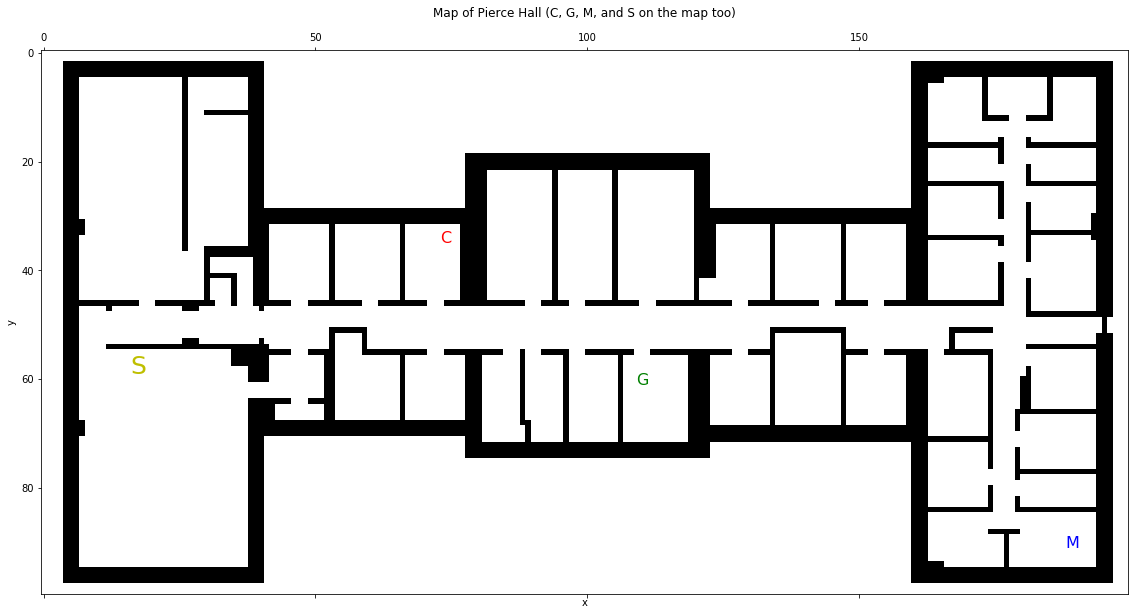

In [149]:
posS = (59, 16)
plt.figure(figsize=(20,10))
plt.spy(pierce)
plt.text(posC[1],posC[0], 'C', color='r', fontsize=16)
plt.text(posG[1],posG[0], 'G', color='g', fontsize=16)
plt.text(posM[1],posM[0], 'M', color='b', fontsize=16)
plt.text(posS[1],posS[0], 'S', color='y', fontsize=25)

plt.title("Map of Pierce Hall (C, G, M, and S on the map too)")
plt.xlabel("x")
_ = plt.ylabel("y")

In [150]:
h_cell = 36.6 # each cell corresponds to 36.6cm
print("Distance from S to C: {}cm".format(round(np.sqrt(((posS[0]-posC[0])*h_cell)**2 + ((posS[1]-posC[1])*h_cell)**2))))
print("Distance from S to G: {}cm".format(round(np.sqrt(((posS[0]-posG[0])*h_cell)**2 + ((posS[1]-posG[1])*h_cell)**2))))
print("Distance from S to M: {}cm".format(round(np.sqrt(((posS[0]-posM[0])*h_cell)**2 + ((posS[1]-posM[1])*h_cell)**2))))

Distance from S to C: 2264.0cm
Distance from S to G: 3405.0cm
Distance from S to M: 6403.0cm


The results make total sense: **C** is the first to hear a sound (0.0735s), and is the closest to the speaker **S** (~2264cm); **G** is the second to hear a sound (0.1085s), and is a little bit further than **C** (~3405cm); **M** is the last one to hear a sound (0.2365s), and is substantially further than **C** and **G** (~6403cm).

#### d) Plot p(t) at C, G, and M. Discuss which is most likely to be disturbed by the speaker.

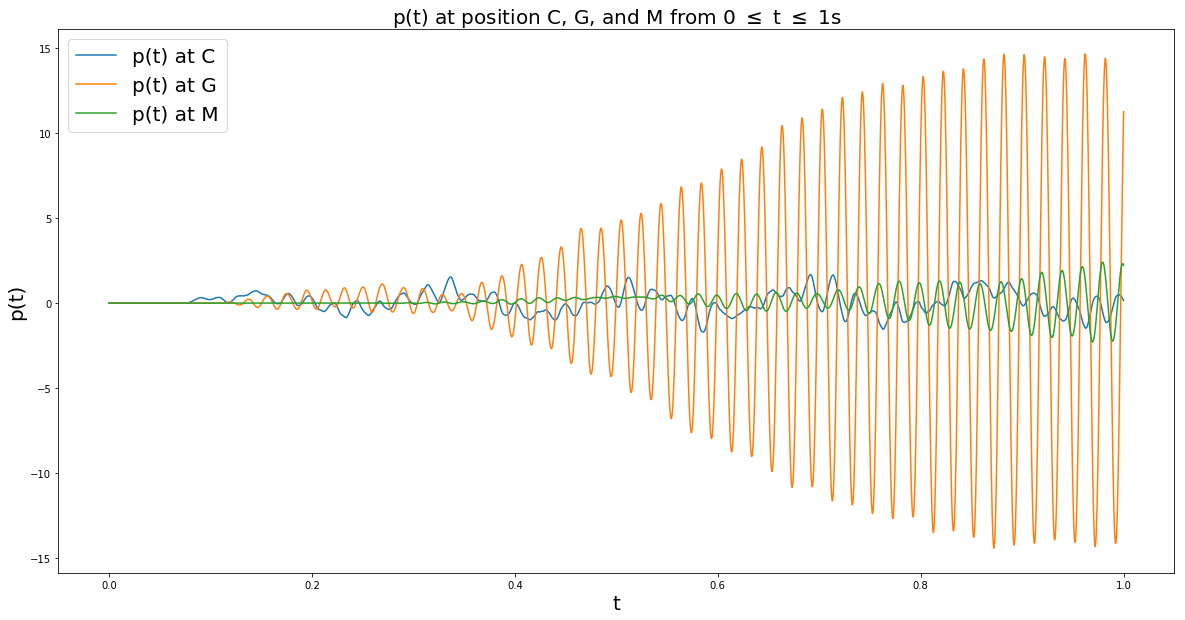

In [152]:
pt_domain = [get_t_from_n(n) for n in range(get_n_from_t(1. + get_delta_t()))]
plt.figure(figsize=(20,10))
plt.plot(pt_domain, pC[:len(pt_domain)], label='p(t) at C')
plt.plot(pt_domain, pG[:len(pt_domain)], label='p(t) at G')
plt.plot(pt_domain, pM[:len(pt_domain)], label='p(t) at M')
plt.legend(fontsize=20)
plt.title(r'p(t) at position C, G, and M from 0 $\leq$ t $\leq$ 1s', fontsize=20)
plt.xlabel("t", fontsize=20)
_ = plt.ylabel("p(t)", fontsize=20)

In [153]:
print("Maximum pressure at point C: {}Pa".format(max([abs(pt) for pt in pC])))
print("Maximum pressure at point G: {}Pa".format(max([abs(pt) for pt in pG])))
print("Maximum pressure at point M: {}Pa".format(max([abs(pt) for pt in pM])))

Maximum pressure at point C: 1.7011116714356957Pa
Maximum pressure at point G: 14.733072428514731Pa
Maximum pressure at point M: 2.412465512759878Pa


This corroborates the results in the previous graph: point **G** is subject to a higher pressure than point **C** and **M**, hence **G** is the most likely to be disturbed by the speaker.

### Question 3: Solving a nonlinear boundary value problem (BVP)

#### a) Derive the Jacobian $J_F \in \mathbb{R}^{(n-2)\times(n-2)}$ for the system $F(U)$. Describe the sparsity pattern of $J_F$.

Recall that $F_i(U) = \frac{U_{i+1} - 2U_i + U_{i-1}}{h^2} - e^{U_i} = 0$. 

$$J_F = \begin{bmatrix} 
    \frac{\partial F_1}{\partial U_1} & \frac{\partial F_1}{\partial U_2} & \dots & \frac{\partial F_1}{\partial U_{n-2}} \\
    \frac{\partial F_2}{\partial U_1} & \frac{\partial F_2}{\partial U_2} & \dots & \frac{\partial F_2}{\partial U_{n-2}} \\
    \vdots & \vdots & \ddots & \vdots\\
    \frac{\partial F_{n-2}}{\partial U_1} & \frac{\partial F_{n-2}}{\partial U_2} & \dots & \frac{\partial F_{n-2}}{\partial U_{n-2}} \\
    \end{bmatrix}
$$

$$J_F = \begin{bmatrix} 
    -\frac{2}{h^2} - e^{U_1} & \frac{1}{h^2} & 0 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
    \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_2} & \frac{1}{h^2} & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
    0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_3} & \frac{1}{h^2} & 0 & 0 & \dots & 0 & 0 & 0 \\
    0 & 0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_4} & \frac{1}{h^2} & 0 & \dots & 0 & 0 & 0 \\
    \vdots & \vdots &  & \ddots & & \ddots & &  & \vdots & \vdots \\
    \vdots & \vdots &  &  & \ddots & & \ddots &  & \vdots & \vdots \\
    0 & 0 & 0 & \dots & 0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_{n-5}} & \frac{1}{h^2} & 0 & 0 \\
    0 & 0 & 0 & \dots & 0 & 0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_{n-4}} & \frac{1}{h^2} & 0 \\
    0 & 0 & 0 & \dots & 0 & 0 & 0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_{n-3}} & \frac{1}{h^2} \\
    0 & 0 & 0 & \dots & 0 & 0 & 0 & 0 & \frac{1}{h^2} & -\frac{2}{h^2} - e^{U_{n-2}}\\
    \end{bmatrix}
$$

$J_F$ is a tridiagonal symmetric matrix.

* It is tridiagonal because all nonzero elements are on the main diagonal, the diagonal below, and the diagonal above.
* It is symmetric because all elements are zero, except for the main diagonal (which has no effect on the symmetric properties), and the lower and upper diagonals (which are all formed of the same element $\frac{1}{h^2})$.

#### b) Use Newton's Method to solve this nonlinear ODE BVP for $n=101$.

We start with an initial guess $U^0 = 0$.

In [134]:
def compute_jacobian(U, h):
    nmin2 = len(U)
    Jf = np.zeros((nmin2, nmin2))
    main_diag_value = -2/h**2 # first term for all elements on the main diagonal of the Jacobian
    second_diag_value = 1/h**2 # value for all elements on the diagonal below and above the main diagonal
    
    for i in range(nmin2):
        if i > 0:
            Jf[i][i-1] = second_diag_value # value for lower diagonal
        if i < nmin2 - 1:
            Jf[i][i+1] = second_diag_value # value for upper diagonal
            
        Jf[i][i] = main_diag_value - np.e**U[i]
    
    return Jf

def compute_f(U, h):
    f = np.zeros(len(U))
    last = len(U) - 1 # last index of `xk`

    for i, Uk in enumerate(U):
        fk = -2 * Uk
        
        if i > 0:
            fk += U[i-1]
        if i < last:
            fk += U[i+1]
            
        fk /= h**2
        fk -= np.e**Uk
        
        f[i] = fk
        
    return f


def compute_newton(U, h):
    return np.linalg.solve(compute_jacobian(U, h), -compute_f(U, h))

def solve_U(n):
    h = 2 / (n-1)
    U = np.zeros(n-2) # U0 = 0
    k = 0

    while True:
        k += 1
        sk = compute_newton(U, h)
        U += sk

        if np.linalg.norm(sk,2) / np.linalg.norm(U, 2) < 1e-10:
           break

    return U, k

In [135]:
U101, k = solve_U(101)
print("It took {} iterations to solve U ".format(k))

# pad U with U0 and Un-1
U101 = np.insert(U101, 0, 0)
U101 = np.append(U101, 0)

It took 5 iterations to solve U 


In [122]:
U101

array([ 0.        , -0.01549574, -0.03059763, -0.04531158, -0.05964325,
       -0.07359807, -0.08718128, -0.10039789, -0.1132527 , -0.12575034,
       -0.13789525, -0.14969168, -0.16114373, -0.1722553 , -0.18303017,
       -0.19347195, -0.20358408, -0.2133699 , -0.22283257, -0.23197514,
       -0.24080053, -0.24931151, -0.25751077, -0.26540083, -0.27298413,
       -0.28026299, -0.28723962, -0.29391611, -0.30029447, -0.30637659,
       -0.31216427, -0.3176592 , -0.32286299, -0.32777715, -0.3324031 ,
       -0.33674217, -0.34079561, -0.34456456, -0.3480501 , -0.35125322,
       -0.35417481, -0.35681571, -0.35917664, -0.36125827, -0.36306119,
       -0.36458588, -0.36583278, -0.36680224, -0.36749451, -0.3679098 ,
       -0.36804822, -0.3679098 , -0.36749451, -0.36680224, -0.36583278,
       -0.36458588, -0.36306119, -0.36125827, -0.35917664, -0.35681571,
       -0.35417481, -0.35125322, -0.3480501 , -0.34456456, -0.34079561,
       -0.33674217, -0.3324031 , -0.32777715, -0.32286299, -0.31

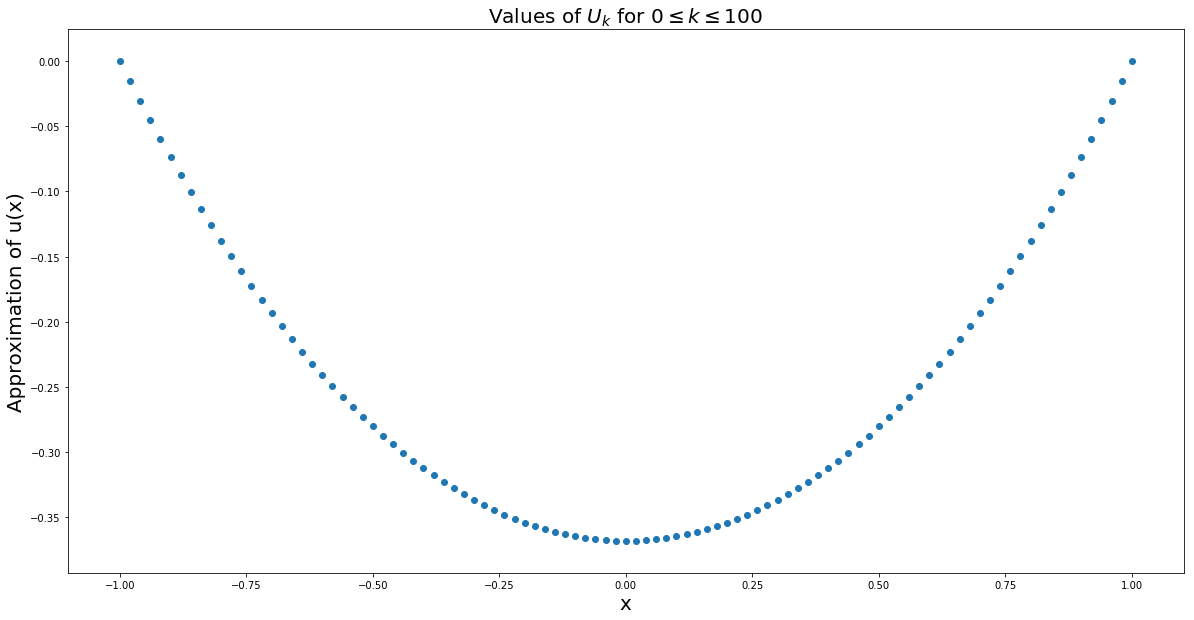

In [119]:
h101 = 2 / (101-1)

plt.figure(figsize=(20,10))
plt.scatter([-1 + i*h101 for i in range(101)], U101)
plt.title(r"Values of $U_k$ for $0 \leq k \leq 100$", fontsize=20)
plt.xlabel("x", fontsize=20)
_ = plt.ylabel("Approximation of u(x)", fontsize=20)

We want to find the value of $u(0)$. Knowing that $x_i = -1 + ih$ in our discretized n-point grid, where $h = \frac{2}{n-1} = 0.02$ with $n=101$

$$0 = -1 + ih$$
$$i = \frac{1}{h} = \frac{1}{0.02} = 50$$

So $u(0) \approx U_{50}$

In [131]:
print("u(0) is approximated to", round(U101[50],4))

u(0) is approximated to -0.368
